In [ ]:
import xgboost as xgb
xgb.set_config(verbosity=0)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Importing LuciferML
from luciferml.supervised.classification import Classification

In [3]:
dataset = pd.read_csv('../input/body-performance-data/bodyPerformance.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.isnull().sum()

## Luckily we don't have any null values.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [8]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

In [9]:
dataset = dataset.sort_values('age')

In [10]:
fig = px.line(dataset,x = 'age', y = ['height_cm','weight_kg'], template = 'plotly_dark', title = 'Variation of Height and Weight with Age')
fig.show()

In [11]:
fig = px.line(dataset,x = 'age', y = ['body fat_%','diastolic', 'systolic'], template = 'plotly_dark', title = 'Variation of Systolic and Diastolic BP with Age')
fig.show()

In [12]:
fig = px.line(dataset,x = 'age', y = ['sit and bend forward_cm','broad jump_cm'], template = 'plotly_dark', title = 'Variation of Sit and Bend and Broad Jump with Age')
fig.show()

## From above visualisations you can see the data is ditributed over all age intervals

In [13]:
fig = px.bar(dataset, y = 'gender',color="age", template = 'plotly_dark')
fig.show()

In [14]:
fig = px.bar(dataset, y = 'gender',color="class", template = 'plotly_dark')
fig.show()

## From above visualisations you can see we clearly have more data for Males as compared to Females and therefore more 'A class individuals are Males'

In [15]:
fig = px.histogram(dataset, y="sit-ups counts", x="weight_kg", color="age",
                   hover_data=dataset.columns, template = 'plotly_dark', title = 'Sit Up count and weight according to the age')
fig.show()

## From above visualisation you can see people who are having weight b/w 65-80 are able to do more situps

In [16]:
fig = px.scatter_ternary(dataset, a="age", b="weight_kg", c="body fat_%",hover_name="height_cm",
    color="class", template = 'plotly_dark',size="sit-ups counts", size_max=30,)
fig.show()

## From above scatter plot we can see the individuals who are young have low weight and low body fat

In [17]:
fig = px.scatter(dataset,
                 x="diastolic", y='systolic', size="age", color="gender",
                 log_x=True, size_max=60,
                 template='plotly_dark', title='Blood Pressure according to age and gender')
fig.show()

## From above plot we can see there are 2 Male outliers who are having really low diastolic pressure. 
## Most of the females are having low Blood pressure problem and Males have normal Blood Pressure

In [18]:
fig = px.scatter_3d(dataset, x='diastolic', y='systolic', z='sit and bend forward_cm',
              color='gender', template = 'plotly_dark', title = 'Distribution of Blood Pressure with Sit and bend excercise')
fig.show()

## From above plot we can see that:
### 1. There are only two Male Candidates who are able to do sit and bend forward exercise above 150 cm
### 2. Males are having high blood pressure eventhough they are not able to achive more distance

In [19]:
fig = px.density_heatmap(dataset, x="gripForce", y ="class",title = 'Grip Force vs Class', template = 'plotly_dark')
fig.show()

## From above plot we can see:
### 1. Most Class A candidates have a gripforce range from 25 to 30 units
### 2. Most Class B candidates have a gripforce range from 40 to 50 units
### 3. Most Class C candidates have a gripforce range from 38 to 42 units
### 4. Most Class D candidates have a gripforce range from 37 to 40 units

In [20]:
fig = px.density_heatmap(dataset, x="weight_kg", y ="age",title = 'Weight vs Age', template = 'plotly_dark')
fig.show()

## From above plot we can see:
### 1. Maximum individual b/w age 25-29 years have weight from 70 to 74 Kg


In [21]:
fig = px.density_heatmap(dataset, x="height_cm", y ="age",title = 'Height vs Age', template = 'plotly_dark')
fig.show()

## From above plot we can see:
### 1. Candidates with age from 25 to 29 have height from 170-175 cm


In [22]:
fig = px.box(dataset, x="age", y="gender", template = 'plotly_dark', 
             title = 'Representation of Age with Gender')
fig.show()

In [23]:
fig = px.box(dataset, x="age", y="broad jump_cm", template = 'plotly_dark', 
             title = 'Representation of Age with Gender')
fig.show()

## From above plot we can see there are certain outliers in most age intervals

In [24]:
fig = px.pie(dataset, names='class', values='age', template = 'plotly_dark', 
             title = 'Representation of Class with their Age')
fig.show()

## From above plot we can see that age wise most candidate fall under Class D.

In [25]:
fig = px.pie(dataset, names='class', values='height_cm', template = 'plotly_dark', 
             title = 'Representation of Class with their Height')
fig.show()

## From above plot we can see that height wise most candidate fall under Class D.

In [26]:
fig = px.pie(dataset, names='class', values='weight_kg', template = 'plotly_dark', 
             title = 'Representation of Class with their Weight')
fig.show()

## From above plot we can see that weight wise most candidate fall under Class D.

In [27]:
fig = px.pie(dataset, names='class', values='body fat_%', template = 'plotly_dark', 
             title = 'Representation of Class with their Body fat')
fig.show()

## From above plot we can see that Class D candidates have higher body fat as compared to others.

In [28]:
fig = px.imshow(dataset.corr(), template = 'plotly_dark')
fig.show()

## From above plot we can say that:
1. Height and Weight are linearly dependent
2. Body Fat and Broad jump are inversely dependent
3. Height and gripforce are linearly dependent
4. Gripforce and sit up counts are linearly dependent

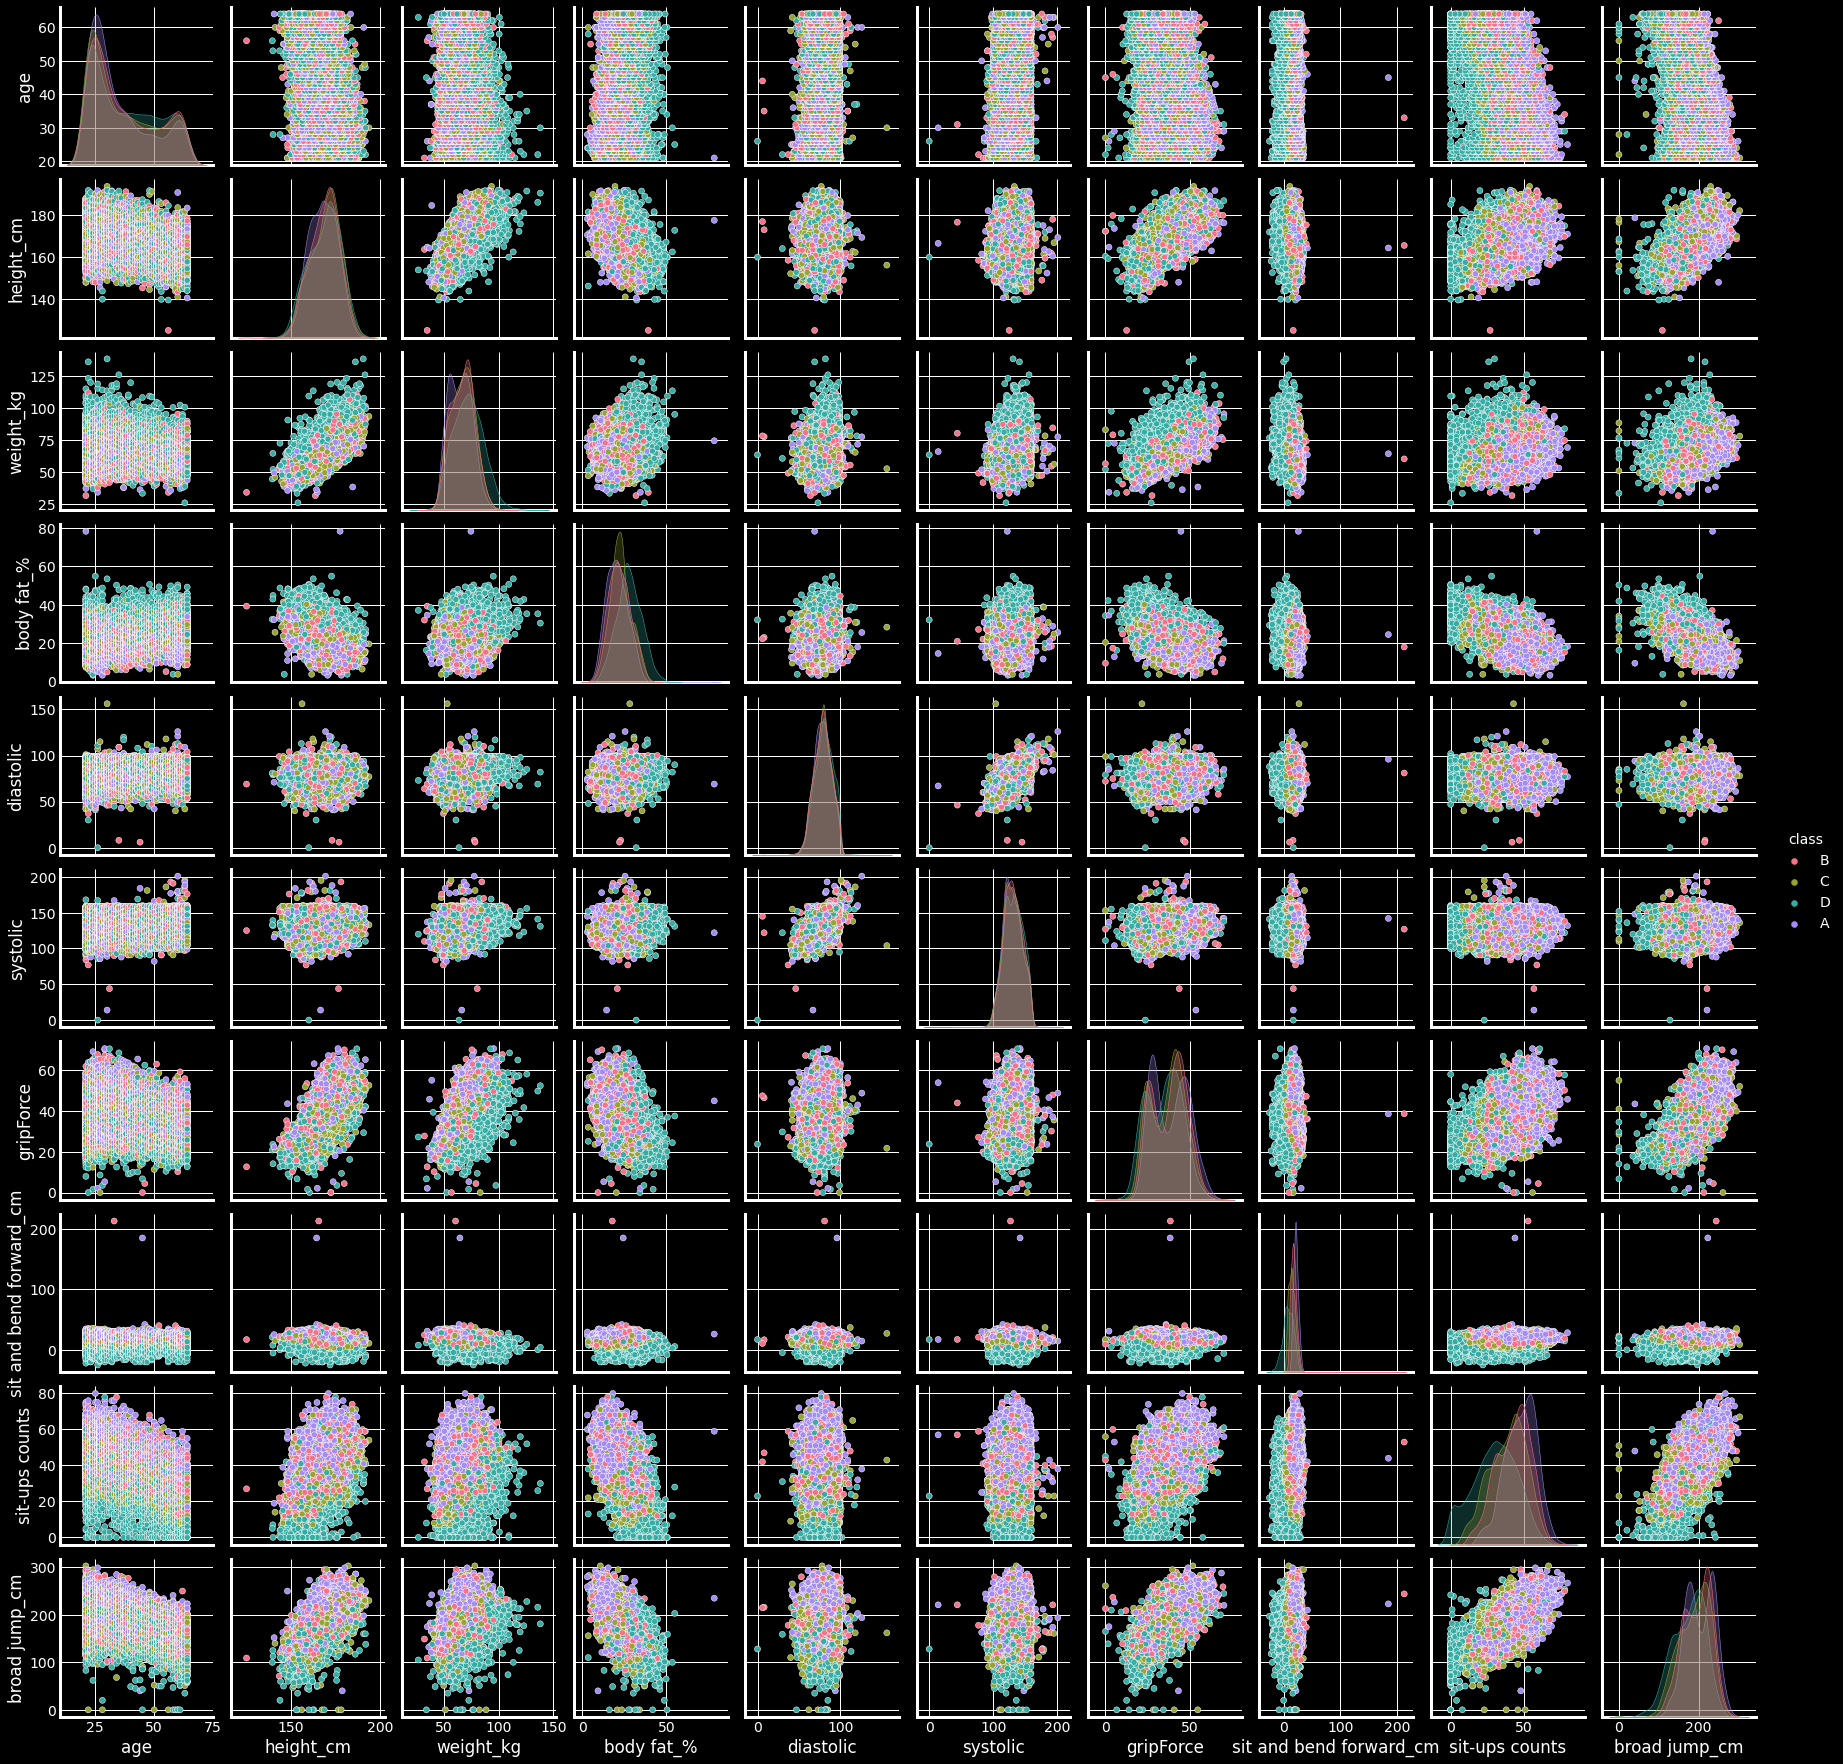

In [29]:
sns.pairplot(dataset, hue="class", palette="husl");

In [30]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [31]:
classifier = Classification(predictor=['all'], smote='y', exclude_models=['ridg'])

In [32]:
classifier.fit(features, labels)


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



Name   Accuracy  KFold Accuracy  \
0                 Logistic Regression  61.343284       61.841989   
1         Stochastic Gradient Descent  55.298507       56.326970   
2                          Perceptron  48.134328       49.635619   
3       Passive Aggressive Classifier  43.171642       46.126867   
4              Support Vector Machine  70.335821       68.486472   
5                K-Nearest Neighbours  60.970149       59.023606   
6                      Decision Trees  64.776119       64.044632   
7                         Naive Bayes  56.305970       54.488055   
8            Random Forest Classifier  74.179104       73.077714   
9        Gradient Boosting Classifier  72.761194       71.808430   
10                AdaBoost Classifier  59.514925       59.714279   
11                 Bagging Classifier  70.858209       71.332544   
12             Extra Trees Classifier  71.940299       71.743114   
13                LightGBM Classifier  76.231343       75.270740   
14                CatBoost Classifier  74.850746       73.777497   
15                 XGBoost Classifier  75.895522       74.785326   
16  Multi Layer Perceptron Classifier  40.858209       73.768012   

                                                Model  
0                                LogisticRegression()  
1                                     SGDClassifier()  
2                                        Perceptron()  
3                       PassiveAggressiveClassifier()  
4                                               SVC()  
5                              KNeighborsClassifier()  
6                            DecisionTreeClassifier()  
7                                        GaussianNB()  
8   (DecisionTreeClassifier(max_features='auto', r...  
9   ([DecisionTreeRegressor(criterion='friedman_ms...  
10  (DecisionTreeClassifier(max_depth=1, random_st...  
11  (DecisionTreeClassifier(random_state=506804865...  
12  (ExtraTreeClassifier(random_state=2091731024),...  
13                                   LGBMClassifier()  
14  <catboost.core.CatBoostClassifier object at 0x...  
15  XGBClassifier(base_score=0.5, booster='gbtree'...  
16                                    MLPClassifier()


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/classifier/models/LightGBM_Classifier_1641573439.pkl and its scaler to lucifer_ml_info/best/classifier/scalers/LightGBM_Classifier_Scaler_1641573439.pkl 

Time Elapsed :  419.67 seconds 



In [33]:
classifier.best_classifier.summary()


Best Model Summary:
Name:  LightGBM Classifier
Accuracy:  76.23134328358209
KFold Accuracy:  75.27074013685076




In [34]:
classifier = Classification(predictor=['lgbm','cat'], smote='y', tune=True,lgbm_objective='multiclass')

In [35]:
classifier.fit(features,labels)


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]



learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
[W 2022-01-07 17:13:35,481] Trial 1 failed, because the objective function returned nan.
[W 2022-01-07 17:13:35,748] Trial 3 failed, because the objective function returned nan.
[W 2022-01-07 17:13:35,750] Trial 0 failed, because the objective function returned nan.
[W 2022-01-07 17:13:36,106] Trial 2 failed, because the objective function returned nan.
[W 2022-01-07 17:13:37,722] Trial 4 failed, because the objective function returned nan.
[W 2022-01-07 17:13:37,942] Trial 7 failed, because the objective function returned nan.
[W 2022-01-07 17:13:38,147] Trial 6 failed, because the objective function returned nan.
[W 2022-01-07 17:13:38,323] Trial 5 failed, because the objective

HyperParam Tuning Failed with Error:  No trials are completed yet. 

Training Done [ ✓ ]

Results Below



Name   Accuracy  KFold Accuracy  \
0  LightGBM Classifier  76.231343       75.270740   
1  CatBoost Classifier  74.850746       73.777497   

                                               Model  \
0                                   LGBMClassifier()   
1  <catboost.core.CatBoostClassifier object at 0x...   

                                     Best Parameters  Best Accuracy  
0  {'n_estimators': 862, 'learning_rate': 0.01641...       75.87724  
1                                               None        0.00000


Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/classifier/models/LightGBM_Classifier_1641575669.pkl and its scaler to lucifer_ml_info/best/classifier/scalers/LightGBM_Classifier_Scaler_1641575669.pkl 

Time Elapsed :  2226.94 seconds 

